In [14]:
##### -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division
# import ruptures as rpt
# import pwlf
from scipy import interpolate
from __future__ import division
from more_itertools import chunked
%matplotlib widget

In [96]:
# read the correlated force data and image data from step2:(2_Correlation_image_force).e.g.:cycle#1-correlated_data.xlsx
# cor_name = input('please type in the file name:' ) + '.xlsx'
cor_path = input('please type in the file path:')

cor_name = str('cycle#1-correlated_data.xlsx')
cor_name2 = str('image data-cycle#1-Intensity along DNAp-filtered.txt')
cor_name3 = str('StepFit_Result/image data-cycle#1-Intensity along DNAp-filtered_fits.txt')

cor_file = os.path.join(cor_path, cor_name) 
cor_file2 = os.path.join(cor_path, cor_name2) 
cor_file3 = os.path.join(cor_path, cor_name3) 

In [97]:
# read the correlated force data
raw_basepair = pd.read_excel(cor_file,sheet_name = 'raw_basepair')
cp_basepair = pd.read_excel(cor_file,sheet_name = 'cp_basepair')
# read the correlated image data
raw_intensity = np.loadtxt(cor_file2)
filtered_intensity = np.genfromtxt(cor_file3, delimiter=',', skip_header=1)
step_intensity = pd.read_excel(cor_file,sheet_name = 'step_intensity')
binarized_intensity = pd.read_excel(cor_file,sheet_name = 'binarized_intensity')

time_intens = binarized_intensity['time/s']
time_intens = np.array(time_intens)
intensity_raw = raw_intensity.T[1]
intensity_filtered = filtered_intensity.T[1]
intensity = binarized_intensity['binarized_intensity']
intensity = np.array(intensity)
intensity_step = step_intensity['step_intensity']
intensity_step = np.array(intensity_step)

bp_time = raw_basepair['time/s']
bp_time = np.array(bp_time)
bp = raw_basepair['raw_basepair']
bp = np.array(bp)
cp_basepair_interp = cp_basepair['cp_basepair']
cp_basepair_interp = np.array(cp_basepair_interp)

# print(raw_basepair.head())
# print(cp_basepair.head())
# print(binarized_intensity.head())

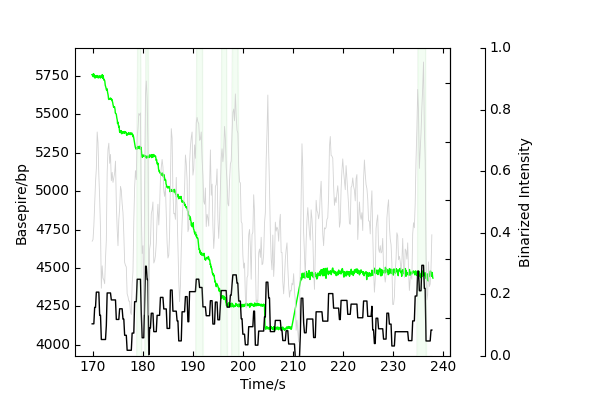

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [98]:
# plot the correlated force data and image data from step 2 to double check
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(6,4))
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s",fontdict=font)
host.set_ylabel("Basepire/bp",fontdict=font)
# host.set_ylabel("DNAp Activity Burst")
par1.set_ylabel("Step-like Intensity",fontdict=font)
par2.set_ylabel("Binarized Intensity",fontdict=font)

p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)


# p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
p3, = par3.plot(time_intens,intensity_raw,color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.axhline(np.average(bagrnd_signal_filter)+threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--',label=str(threshold_sigma) + ' Sigma threshold')
# par1.axhline(np.average(bagrnd_signal_filter)-threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--')

par1.set_ylim(10, 77)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.ylim(6500,7800)
# plt.xlim(17,29)
plt.show()
plt.tight_layout()

plt.savefig(cor_file.replace('-correlated_data.xlsx', '-all_correlated_data-replot.eps'), format='eps', dpi=300,bbox_inches='tight')

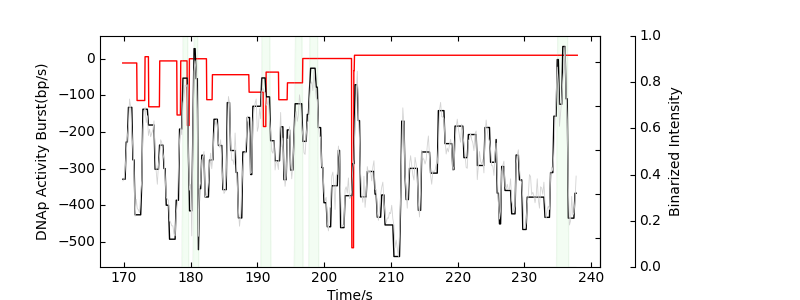

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [99]:
# plot the burst activity and fluorescence image data 
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(8,3))
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s",fontdict=font)
host.set_ylabel("DNAp Activity Burst(bp/s)",fontdict=font)
# par1.set_ylabel("Step-like Intensity",fontdict=font)
par2.set_ylabel("Binarized Intensity",fontdict=font)

# p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)

p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
p3, = par3.plot(time_intens,intensity_raw,color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.set_ylim(7, 87)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.xlim(32,40)
# plt.xlim(32,40)
plt.show()
plt.tight_layout()

plt.savefig(cor_file.replace('-correlated_data.xlsx', '-Activity Burst Correlates with Fluorescence Signal-zoomedin.eps'), format='eps', dpi=300,bbox_inches='tight')


In [100]:
# the following block is intended to load the dada set
segment_exo = np.load(cor_file[:-20] + 'exo-segments' + '.npy', allow_pickle=True)
segment_pol = np.load(cor_file[:-20] + 'pol-segments' + '.npy', allow_pickle=True)

In [101]:
# This step is to get a three y-axis figure, which shows basepairs, raw intensity and binarized intensity [https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html]
def segment_plots(segment, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
        
    time_ROI = segment[0][:,0]
    basepairs_ROI = segment[0][:,1]
    basepairs_fitted_ROI = segment[0][:,2]
    
    time_intens_ROI = segment[1][:,0]
    intensity_ROI = segment[1][:,1]
    intensity_step_ROI = segment[1][:,2]
    intensity_raw_ROI = segment[1][:,3]
    
    twin1 = ax.twinx()
    twin2 = ax.twinx()
    twin3 = ax.twinx()
    
    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    # twin3.spines.right.set_position(("axes", 1.15))
    
    ax.plot(time_ROI,basepairs_fitted_ROI,"lime", label = "step fitted data",linewidth=1)
    ax.plot(time_ROI,basepairs_ROI,"lightgreen",label = "raw basepair data",linewidth=0.4)
    
    ax.set_xlabel('Time/s')
    ax.set_ylabel('Basepairs')
    ax.set_xlim(segment[0][:,0][0],segment[0][:,0][-1])


    twin1.plot(time_intens_ROI,intensity_raw_ROI,color='lightgray',linewidth=0.6)
    twin2.plot(time_intens_ROI,intensity_step_ROI,color='black',linewidth=1,label='Step-like intensity')
    # twin3.plot(time_intens_ROI,intensity_ROI,color='lightgrey',linewidth=0.5, label='Binarized Intensity')
    twin1.yaxis.set_ticklabels([])
    twin3.yaxis.set_ticklabels([])
    twin1.yaxis.set_ticks([])
    twin3.yaxis.set_ticks([])

    twin2.set_ylabel('Fluorescence Intensity (a.u.)')
    twin3.set_ylim(0,1)
    twin3.fill_between(time_intens_ROI,intensity_ROI, 0,step = "pre", color='lightgreen',alpha=0.2)

    return(ax)

# # segment_plots(segment_exo[0]).figure
# plt.figure(figsize=(6,4))
# segment_plots(segment_exo[1])
# plt.tight_layout()
# plt.show()

In [102]:
# define a function to plot the the 1st derivative correlates with the fluorescence signal, to get the figure"Activity Burst Correlates with Fluorescence Signal"
def segment_rate_plots(segment, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
        
    time_ROI = segment[0][:,0]
    basepairs_ROI = segment[0][:,1]
    basepairs_fitted_ROI = segment[0][:,2]
    
    time_intens_ROI = segment[1][:,0]
    intensity_ROI = segment[1][:,1]
    intensity_step_ROI = segment[1][:,2]
    intensity_raw_ROI = segment[1][:,3]
    # rate_ROI = (basepairs_fitted_ROI[2:] - basepairs_fitted_ROI[:-2])/(time_ROI[2:] - time[:-2])
    
    ax1 = ax.twinx()
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    
    ax.plot(time_ROI[:-1],np.diff(basepairs_fitted_ROI)/np.diff(time_ROI),"red", label = "step fitted data",linewidth=1)
    # ax.plot(time_ROI[:-2],rate_ROI,"red", label = "step fitted data",linewidth=1)
    ax.set_xlabel('Time/s')
    ax.set_ylabel('Activity Burst(bp/s)')
    ax.set_xlim(segment[0][:,0][0],segment[0][:,0][-1])
    ax1.plot(time_intens_ROI,intensity_raw_ROI,color='lightgray',linewidth=0.6)
    ax3.plot(time_intens_ROI,intensity_step_ROI,color='black',linewidth=0.8)
    ax1.set_ylabel('Fluorescence Intensity (a.u.)')
    ax2.set_ylim(0,1)
    ax2.fill_between(time_intens_ROI,intensity_ROI, 0,step = "pre", color='lightgreen',alpha=0.1)
    ax2.yaxis.set_ticklabels([])
    ax2.yaxis.set_ticks([])
    ax3.yaxis.set_ticklabels([])
    ax3.yaxis.set_ticks([])
    # plt.show()
    # ax.plot(x, y, **plt_kwargs) #example plot1
    # ax.scatter(x, y, **sct_kwargs) #example plot2
    return(ax)


In [103]:
# print(segment_exo)
print(len(segment_exo))
print(len(segment_pol))
pause

5
1


NameError: name 'pause' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


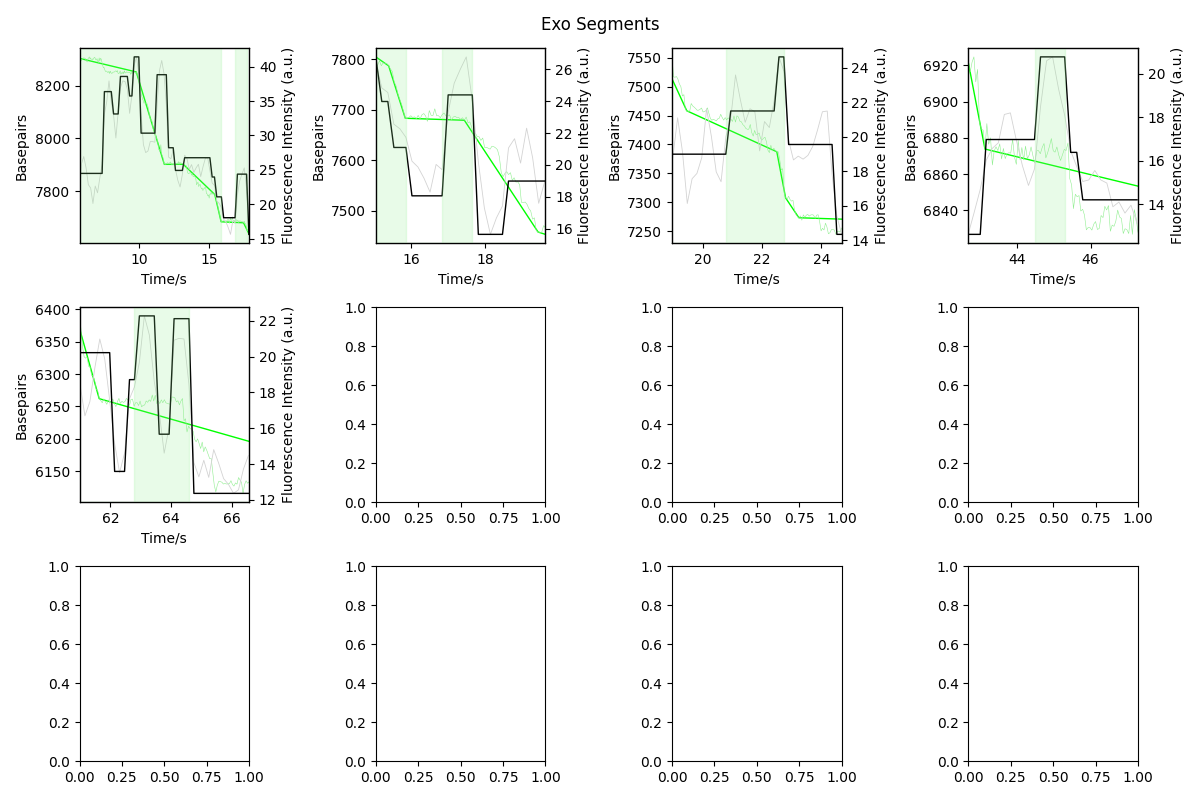

In [ ]:
nrows_exo = 3
ncols_exo = 4

fig, axs = plt.subplots(nrows_exo,ncols_exo, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Exo Segments')
data = np.arange(0, len(segment_exo))

for ax, d in zip(axs.ravel(), data):
    segment_plots(segment_exo[d],ax)
    fig.tight_layout()

fig.savefig(cor_file[:-20] + 'exo-segments' +'.eps', format='eps', dpi=300,bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


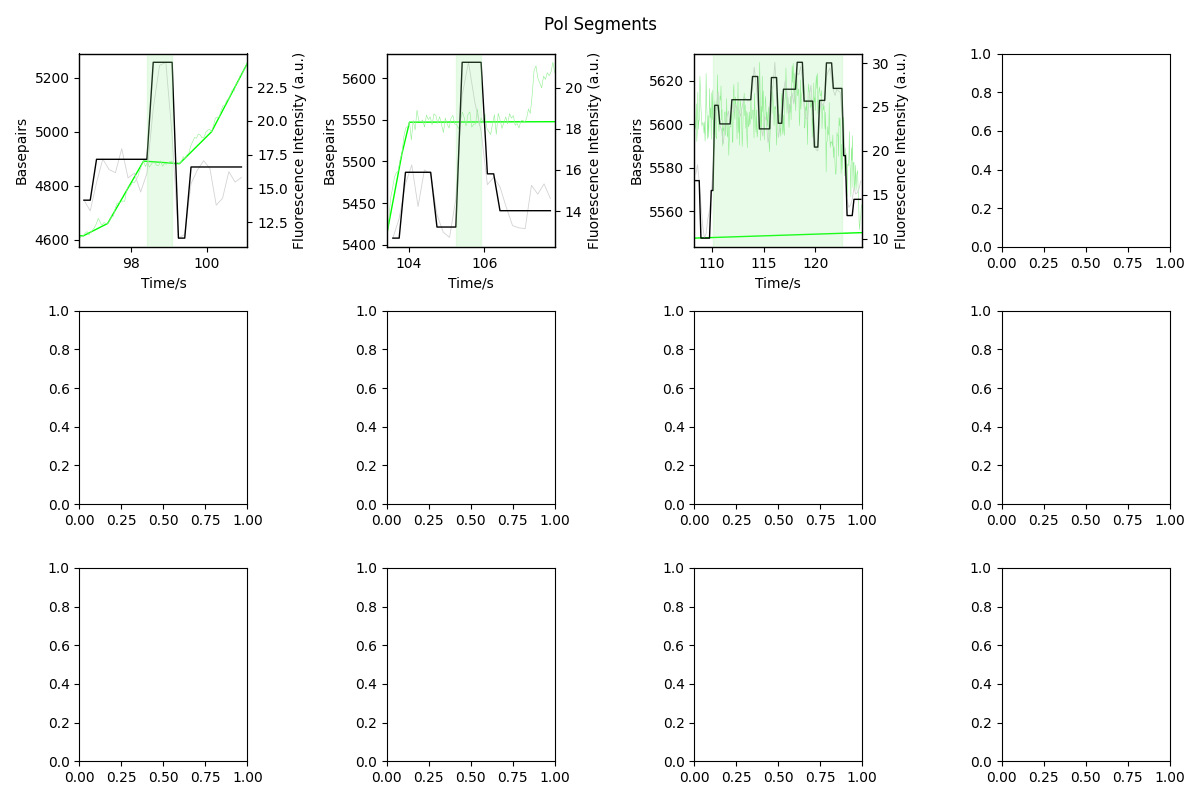

In [ ]:
nrows_pol = 3
ncols_pol = 4

fig, axs = plt.subplots(nrows_pol,ncols_pol, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Pol Segments')
data = np.arange(0, len(segment_pol))

for ax, d in zip(axs.ravel(), data):
    segment_plots(segment_pol[d],ax)
    fig.tight_layout()

fig.savefig(cor_file[:-20] + 'pol-segments' +'.eps', format='eps', dpi=300,bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


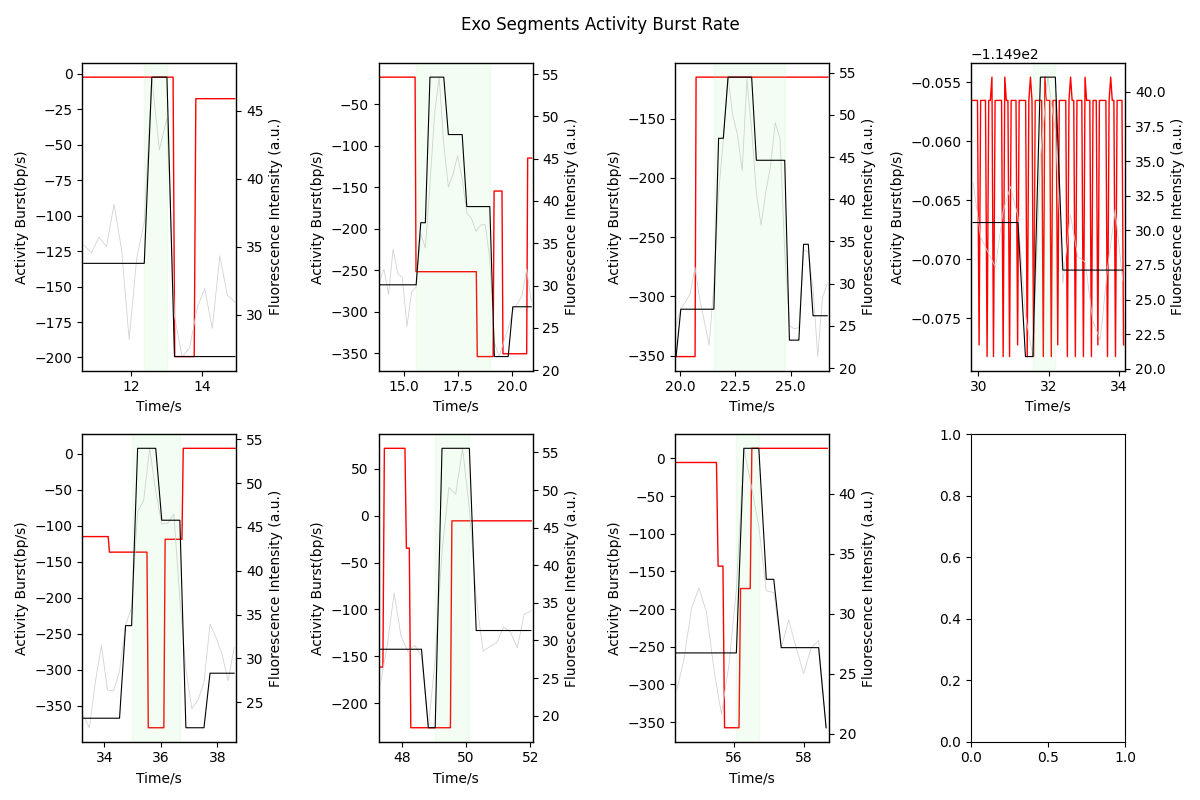

In [ ]:
fig, axs = plt.subplots(nrows_exo,ncols_exo, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Exo Segments Activity Burst Rate')
data = np.arange(0, len(segment_exo))

for ax, d in zip(axs.ravel(), data):
    segment_rate_plots(segment_exo[d],ax)
    fig.tight_layout()

fig.savefig(cor_file[:-20] + 'exo-segments-rate' +'.eps', format='eps', dpi=300,bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


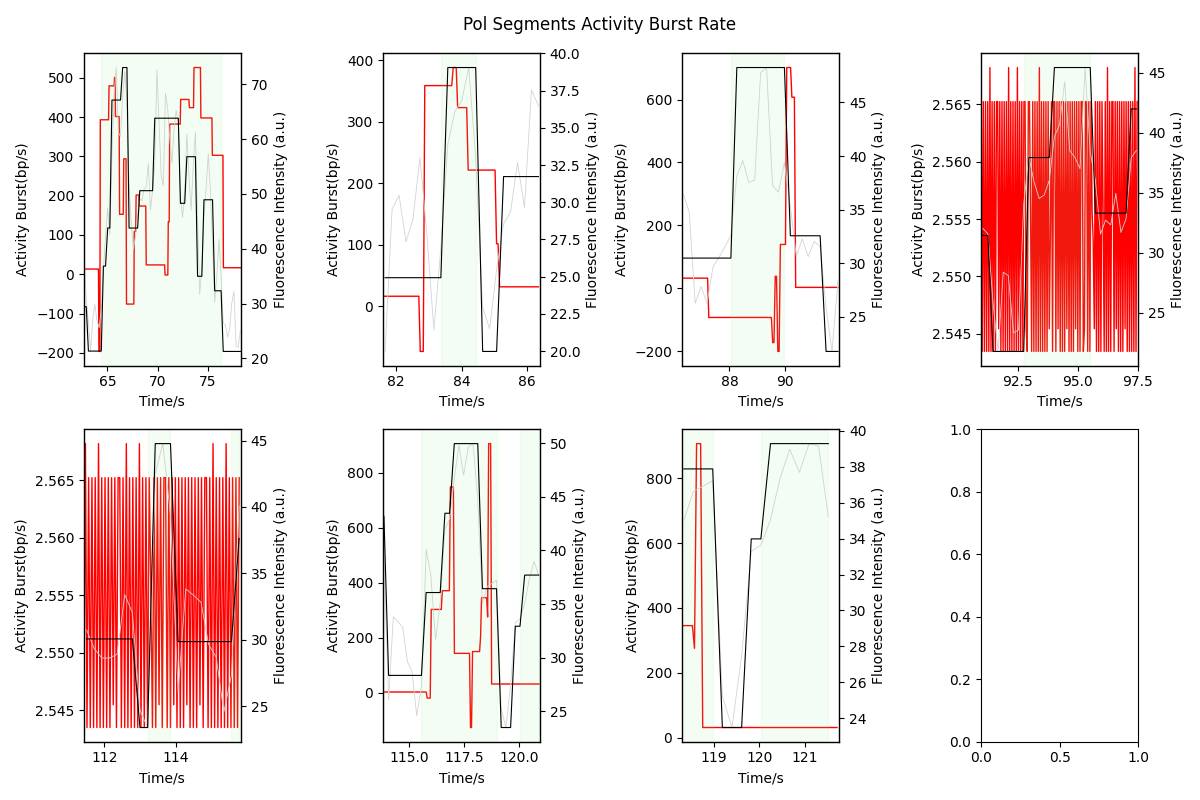

In [ ]:
fig, axs = plt.subplots(nrows_pol,ncols_pol, figsize=(12,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
fig.suptitle('Pol Segments Activity Burst Rate')
data = np.arange(0, len(segment_pol))

for ax, d in zip(axs.ravel(), data):
    segment_rate_plots(segment_pol[d],ax)
    fig.tight_layout()


fig.savefig(cor_file[:-20] + 'pol-segments-rate' +'.eps', format='eps', dpi=300,bbox_inches='tight')

In [ ]:
pause

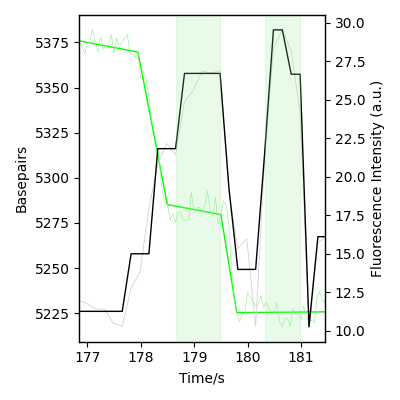

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [104]:
fig = plt.figure(figsize=(4,4))

segment_plots(segment_exo[0])
# plt.xlim(17,29)
plt.tight_layout()
plt.show()

fig.savefig(cor_file[:-20] + 'EPE' +'.eps', format='eps', dpi=300,bbox_inches='tight')

IndexError: index 9 is out of bounds for axis 0 with size 3

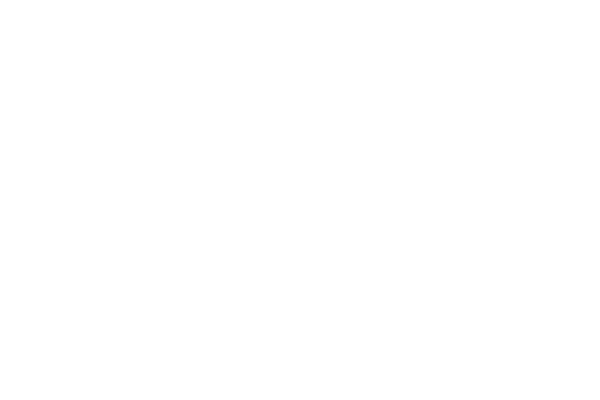

In [ ]:
fig = plt.figure(figsize=(6,4))
segment_rate_plots(segment_pol[9])
plt.tight_layout()
plt.show()

# fig.savefig(cor_file[:-20] + 'exo-segments-rate-interested-Segment' +'.eps', format='eps', dpi=300,bbox_inches='tight')